In [18]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import math as m
import scipy.constants as const

In [19]:
with open('Data/Aufg_5.4.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T
for i in range(len(data[1])):
    data[0][i]-= 729900


data = f.channel_to_pos(data,cal)

In [20]:
data[1] = data[1]*10
yerr = 0.035339825186025027*np.abs(data[1])
print(np.mean(data[2]))

0.030193000531300133


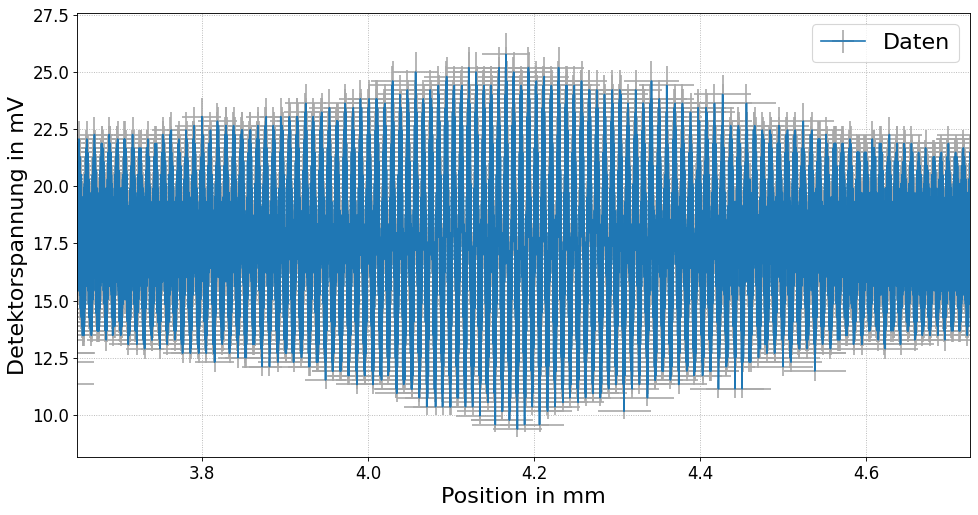

In [21]:
f.figsize(2)
plt.errorbar(data[0],data[1],yerr=yerr,xerr=data[2],label = 'Daten',ecolor='darkgray')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
f.form([3.650,4.725],xlabel='Position in mm',ylabel='Detektorspannung in mV',name='Res/A5_interferogramm.pdf')

Wavelength: 3.688571126257906e-06 m


/tmp/ipykernel_7343/3951455482.py:20: RuntimeWarning: divide by zero encountered in divide
  freqs = 1/freqs


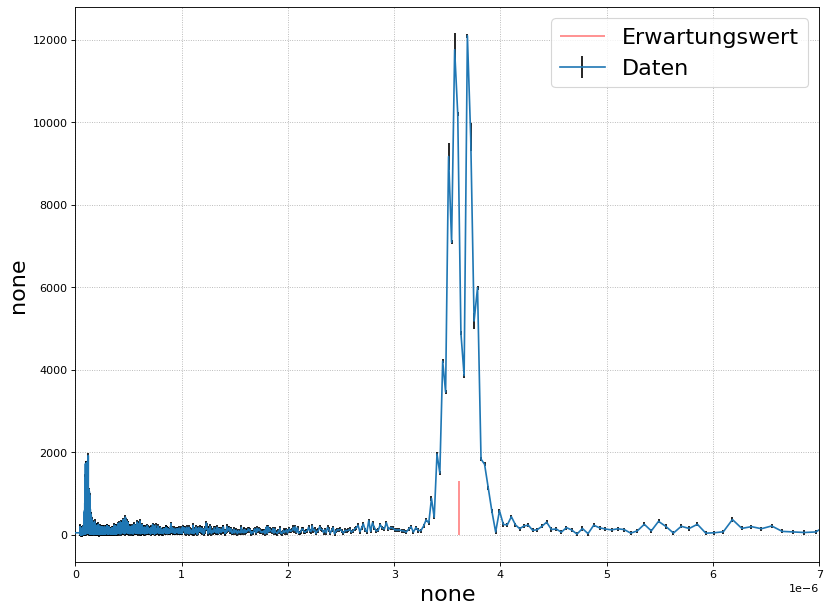

In [22]:
freq_scale = 2/5.127868608985219*1e-3

intensity = data[1]
position  = data[0]*freq_scale


intensity -= np.mean(intensity)


freqs = np.fft.fftfreq(len(intensity), d=((np.mean(np.diff(position)))))
fft_int = np.fft.fft(intensity)
fft_err = np.fft.fft(yerr).clip(5*10)

peak_idx = np.argmax(np.abs(fft_int))
peak_freq = freqs[peak_idx]


print(f"Wavelength: {1/peak_freq} m")

freqs = 1/freqs

f.figsize(1)

plt.errorbar(freqs, np.abs(fft_int),yerr=np.abs(fft_err),ecolor='k',zorder=10,label='Daten')
plt.xlim(0,0.7e-5)
plt.vlines(3.6114e-06,0,1300,colors="r",zorder=5,alpha = 0.5,label='Erwartungswert')
f.form()

In [23]:
dat = [freqs, np.abs(fft_int),np.abs(fft_err)]

sorted_indices = sorted(range(len(dat[0])), key=lambda k: dat[0][k])

dat_sorted = [[dat[0][i], dat[1][i],dat[2][i]] for i in sorted_indices]

dat_sorted = np.array(dat_sorted).T

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 132
    # variables        = 3
    chi-square         = 26589.2232
    reduced chi-square = 206.118009
    Akaike info crit   = 706.320634
    Bayesian info crit = 714.969039
    R-squared          = 0.99996019
[[Variables]]
    amplitude:  0.00268618 +/- 1.1892e-04 (4.43%) (init = 0.003775957)
    center:     3.6381e-06 +/- 7.0905e-09 (0.19%) (init = 3.604374e-06)
    sigma:      1.3224e-07 +/- 6.0396e-09 (4.57%) (init = 1.041552e-07)
    fwhm:       3.1139e-07 +/- 1.4222e-08 (4.57%) == '2.3548200*sigma'
    height:     8103.93268 +/- 356.356637 (4.40%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = +0.5223
    C(amplitude, center) = +0.1094


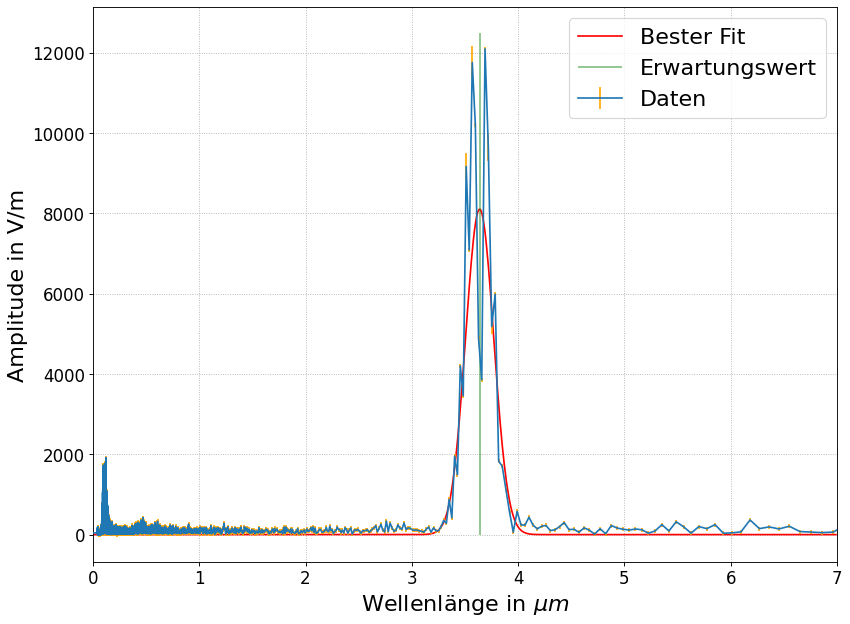

In [24]:
von,bis = f.pos(dat_sorted[0],0.2e-5),f.pos(dat_sorted[0],0.5e-5)


res = f.gausfit(dat_sorted[1,von:bis],dat_sorted[0,von:bis],dat_sorted[2,von:bis])

print(res.fit_report())

xscale = 1e6

f.figsize(1)

plt.errorbar(freqs*xscale, np.abs(fft_int),yerr=np.abs(fft_err),ecolor='orange',zorder=10,label='Daten')
plt.plot(np.arange(0,7e-6,1e-8)*xscale,res.eval(x=np.arange(0,7e-6,1e-8)),color='r',label='Bester Fit')
plt.xlim(0,0.7e-5*xscale)
plt.vlines(3.6381e-06*xscale,0,12500,colors="g",zorder=5,alpha = 0.5,label='Erwartungswert')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
f.form(xlabel=f'Wellenlänge in $\mu m$',ylabel='Amplitude in V/m',name='Res/A5_fftfit.pdf')

In [25]:
#1/e breite
print('1/e Breite')
eb3 = ufloat(res.params["fwhm"].value,res.params["fwhm"].stderr)/ (2*np.log(2)**0.5)*2
print(eb3.format(':1.5'))
recipr = (1/eb3).format(':1.5')
print(f'in reciproken micrometern:{recipr}$\mu m^-1$')
print('1/e höhe')
print(res.params['height'].value/m.e)
print('Kontrolle 1/e breite in fit eingesetzt')
print(res.eval(x=res.params['center'].value-eb3.n/2))

1/e Breite
3.7402e-07+/-0.1708e-07
in reciproken micrometern:2.6737e+06+/-0.1221e+06$\mu m^-1$
1/e höhe
2981.270224931712
Kontrolle 1/e breite in fit eingesetzt
2981.270192493832


In [26]:
lit = ufloat(0.06,0.01)

#print(1/(((lit)*(1/(10^-6)))))
print(1/lit*1e-6)


(1.67+/-0.28)e-05
